In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import numpy as np

In [2]:
# Load the digits dataset
digits = load_digits()
X, y = digits.images, digits.target

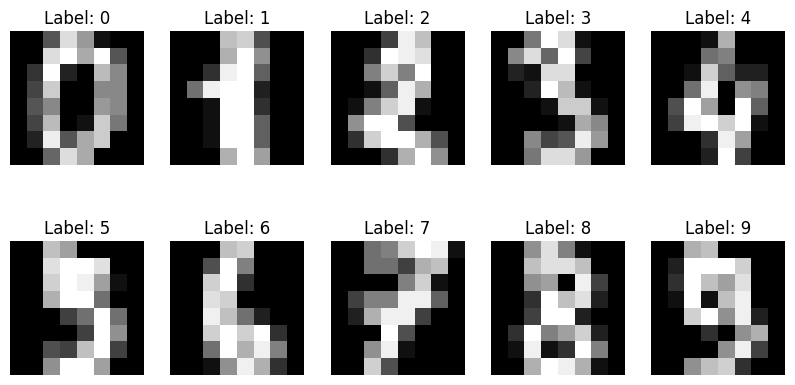

In [3]:
# Display some sample images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i], cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.show()

In [4]:
# Reshaping and Preprocessing the data for CNN
X = X.reshape(X.shape[0], 8, 8, 1)  # Add channel dimension
X = X / 16.0  # Normalize pixel values between 0 and 1

In [5]:
# One-hot encode the labels
y = to_categorical(y, 10)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Build a simple CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Train the CNN model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - loss: 0.0141 - val_accuracy: 0.9833 - val_loss: 0.0622
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0107 - val_accuracy: 0.9861 - val_loss: 0.0698
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9997 - loss: 0.0149 - val_accuracy: 0.9806 - val_loss: 0.0669
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9936 - loss: 0.0233 - val_accuracy: 0.9806 - val_loss: 0.0805
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0210 - val_accuracy: 0.9861 - val_loss: 0.0591
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9996 - loss: 0.0116 - val_accuracy: 0.9833 - val_loss: 0.0670
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9972 - loss: 0.0117 - val_accuracy: 0.9722 - val_loss: 0.0713
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9971 - loss: 0.0110 - val_accuracy: 0.9861 - val_loss:

In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9840 - loss: 0.0695 


In [13]:
# Predicting on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [14]:
# Classification report
report = classification_report(y_true, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      0.97      0.98        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.96      1.00      0.98        47
           6       1.00      0.97      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.97      0.98        30
           9       0.98      1.00      0.99        40

    accuracy                           0.99       360
   macro avg       0.99      0.98      0.99       360
weighted avg       0.99      0.99      0.99       360



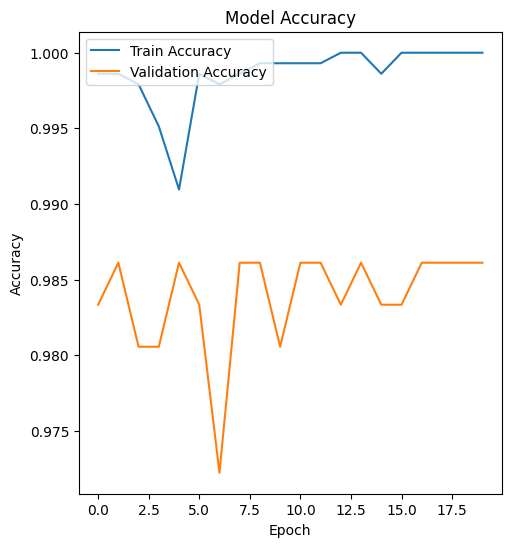

In [15]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

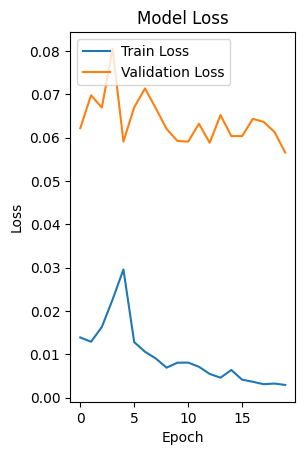

In [16]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

In [17]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Converting predictions from one-hot encoded format to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


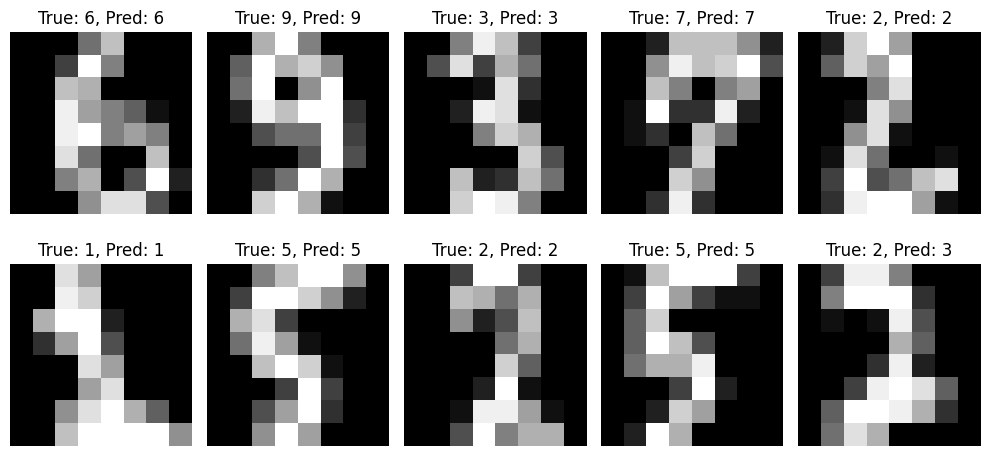

In [18]:
# Display a few test images with their predicted and true labels
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {y_true_classes[i]}, Pred: {y_pred_classes[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

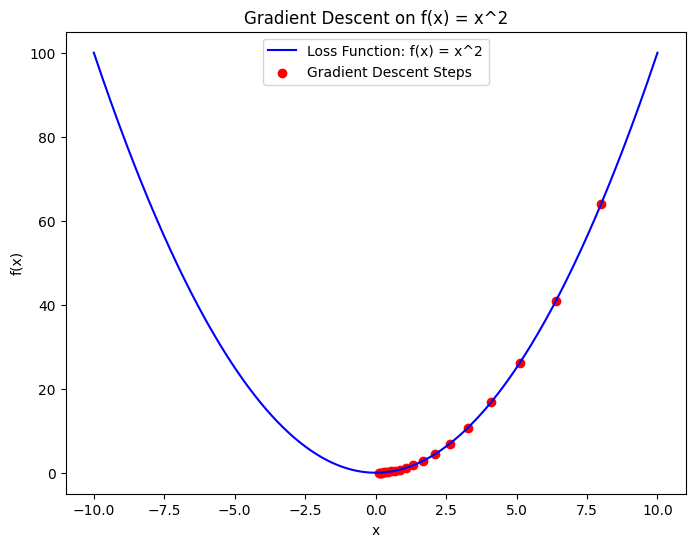

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple quadratic function: f(x) = x^2
def f(x):
    return x**2

# Derivative of f(x): f'(x) = 2x
def df(x):
    return 2 * x

# Gradient descent parameters
x = 10  # Starting point
learning_rate = 0.1
iterations = 20
history = []

# Gradient descent loop
for i in range(iterations):
    grad = df(x)
    x -= learning_rate * grad  # Update rule
    history.append(x)

# Plot the function and the descent steps
x_vals = np.linspace(-10, 10, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='Loss Function: f(x) = x^2', color='blue')
plt.scatter(history, [f(h) for h in history], color='red', label='Gradient Descent Steps')
plt.title("Gradient Descent on f(x) = x^2")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

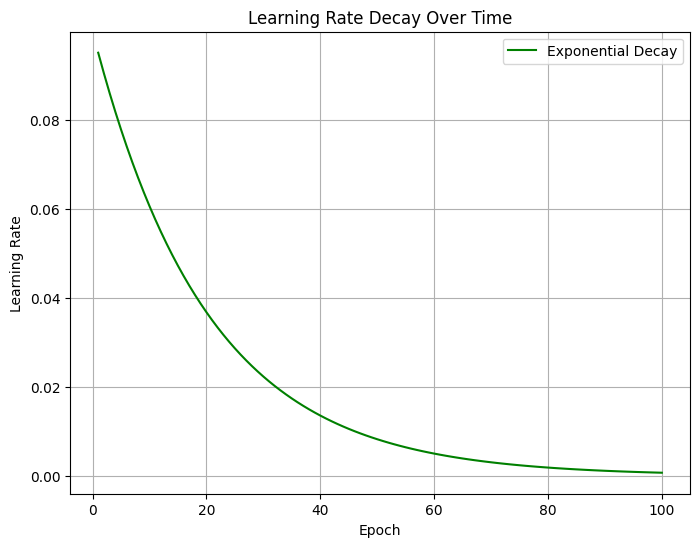

In [22]:
# Visualize learning rate decay over epochs
epochs = np.arange(1, 101)
initial_lr = 0.1

# Exponential decay: lr = lr0 * exp(-decay_rate * epoch)
decay_rate = 0.05
learning_rates = initial_lr * np.exp(-decay_rate * epochs)

plt.figure(figsize=(8, 6))
plt.plot(epochs, learning_rates, label='Exponential Decay', color='green')
plt.title("Learning Rate Decay Over Time")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.legend()
plt.grid(True)
plt.show()